# FRB/US, a simple experiment
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

In this notebook you can make your own experiments by updating variables. Also You can watch some of the capabilities of ModelFlow

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 

This notebook implement the **VAR** flavour. 

## Import Python libraries

In [17]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [18]:
from modelclass import model  
model.widescreen() # Use the whole screen 


## Load the model and the data 
The model and the data has been prepared in a preprocessor step and has been wrapped into one file. 

In [19]:
mfrbus, basedf =  model.modelload('mfrbusvar.pcim',run=0) 
res = mfrbus(basedf,'2020q1','2025q4',silent=True,stats=False)

file read:  C:\modelflow manual\papers\modelbook\content\Federal Reserve Board - US model\mfrbusvar.pcim


## Run alternative 

In [20]:
# Make a new DataFrame with an updated variable # Update variables in the dataframe
altdf=basedf.upd('rffintay_aerr + -0.05')
res2 = mfrbus(altdf)

## Show the results 

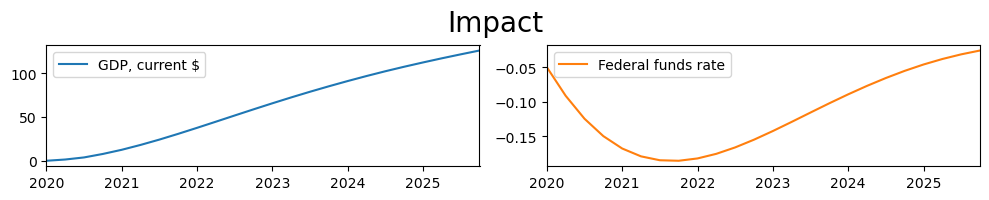

In [21]:
mfrbus['XGDPN RFF'].dif.rename().plot(top=0.8,title='Impact');

## Trace what drives the results
The call graph upstream or downstream a variable can be displayed. 
The thickness of the edges reflect the max explanation of the changes in the variable to the next variable. (for the last experiment) 

### Preceding variables can be traced

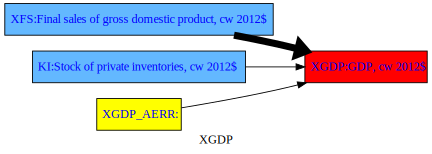

In [22]:
mfrbus.XGDP.tracepre() 

### Preceding variables can be filtered
So only significant variables are displayed<br>in this case variable explaining less than 20 percent are pruned from the dependency tree  

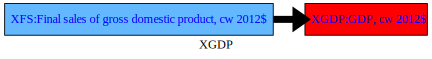

In [23]:
mfrbus.XGDP.tracepre(filter=20) 

### The levels preceding can be specified

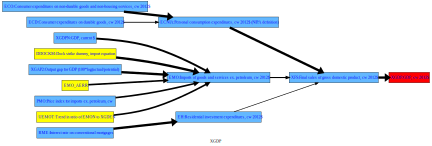

In [24]:
mfrbus.XGDP.tracepre(up=3,filter=20) 

### Dependent variable can be traced 
The levels are specified by down instead of up:

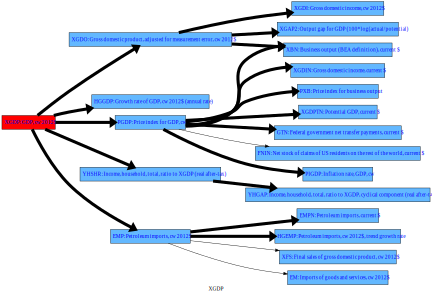

In [25]:
mfrbus.XGDP.tracedep(down=2) 